In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
import random

In [5]:

import numpy as np

import tensorflow as tf

train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 17104 files belonging to 3 classes.
Using 13684 files for training.
Found 17104 files belonging to 3 classes.
Using 3420 files for validation.


In [9]:
import tensorflow as tf

model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5) , padding="same", input_shape=(224,224,1)))
model.add(Activation("relu"))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (5,5) , padding="same"))
model.add(Activation("relu"))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
    
model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(3, activation='softmax'))
adam = optimizers.Adam(lr = 0.003)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 6)       156       
_________________________________________________________________
activation_5 (Activation)    (None, 224, 224, 6)       0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 16)      2416      
_________________________________________________________________
activation_6 (Activation)    (None, 112, 112, 16)      0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 56, 56, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [11]:
initial_epochs = 10
history = model.fit(
  train_dataset,
  epochs=initial_epochs
)

Epoch 1/10
428/428 [==============================] - 48s 106ms/step - loss: 38.3620 - accuracy: 0.7491
Epoch 2/10
428/428 [==============================] - 46s 106ms/step - loss: 0.2104 - accuracy: 0.9277
Epoch 3/10
428/428 [==============================] - 47s 107ms/step - loss: 0.1686 - accuracy: 0.9453
Epoch 4/10
428/428 [==============================] - 46s 107ms/step - loss: 0.1610 - accuracy: 0.9445
Epoch 5/10
428/428 [==============================] - 46s 107ms/step - loss: 0.1704 - accuracy: 0.9396
Epoch 6/10
428/428 [==============================] - 46s 106ms/step - loss: 0.1328 - accuracy: 0.9520
Epoch 7/10
428/428 [==============================] - 46s 105ms/step - loss: 0.1358 - accuracy: 0.9499
Epoch 8/10
428/428 [==============================] - 46s 106ms/step - loss: 0.1128 - accuracy: 0.9557
Epoch 9/10
428/428 [==============================] - 46s 106ms/step - loss: 0.1136 - accuracy: 0.9571
Epoch 10/10
428/428 [==============================] - 46s 106ms/step - 

In [12]:
results=model.evaluate(test_dataset)

107/107 [==============================] - 11s 94ms/step - loss: 0.1274 - accuracy: 0.9556


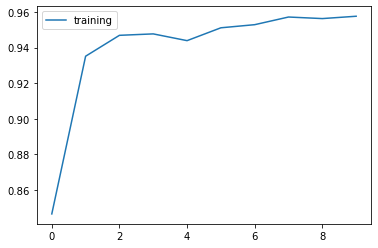

[7.276406764984131, 0.1905127614736557, 0.15801768004894257, 0.1472042202949524, 0.15939271450042725, 0.13619199395179749, 0.12837643921375275, 0.11262712627649307, 0.12082665413618088, 0.11322902143001556]
[0.8463899493217468, 0.9351797699928284, 0.946945309638977, 0.9477491974830627, 0.9439491629600525, 0.9511838555335999, 0.9529377222061157, 0.9572493433952332, 0.9563723802566528, 0.9576877951622009]


In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

# 각종 값 출력
print(history.history['loss'])
print(history.history['accuracy'])

In [14]:
results

[0.1273796111345291, 0.9555555582046509]